In [1]:
import plyfile
import numpy as np
import pathlib
import mesh_utils
import os
import pickle
import symmetry_compressor as symm
from collections import defaultdict, Counter

In [2]:
# data = plyfile.PlyData.read(r"..\data\gemstone_ply\Gemstone.ply")
mesh_path = pathlib.Path(r"..\data\MeshLab_sample_meshes\bunny10k.ply")
# mesh_path = pathlib.Path(r"..\data\MeshLab_sample_meshes\normalmap\matteonormb.ply")
data = plyfile.PlyData.read(mesh_path)

In [7]:
# Counter(map(len, data["face"]["vertex_indices"])).keys()
face_arr = data["face"]["vertex_indices"]
type(face_arr[0])

numpy.ndarray

In [12]:
set(el.name for el in data.elements)

{'face', 'vertex'}

In [23]:
[p.name for p in data["face"].properties]

['vertex_indices', 'flags']

In [21]:
from collections import Counter
Counter(f[1] for f in data["face"])

Counter({0: 9944, 128: 23, 64: 17, 256: 15})

In [4]:
wireframe = mesh_utils.skeleton(data)
print(wireframe)
wf_comp = symm.compress_bipartite(wireframe)
print(wf_comp)

traversing faces: 100%|██████████| 1000/1000 [00:00<00:00, 250047.93it/s]


Graph named '1-Skeleton' with 510 nodes and 1513 edges


processing subgraphs: 100%|██████████| 637/637 [00:00<00:00, 1005.33it/s]

extracted 1x G(2, 3), avg eff = 0.333, max eff = 0.333
extracted 179x G(2, 2), avg eff = 0.250, max eff = 0.250
NSCompressed(1-Skeleton, eff=0.120)


In [5]:
edge_path = pathlib.Path(mesh_path.stem + "_edges").with_suffix(".nscp")
# wf_comp.append_to_file(edge_path)
wf_comp.serialize(edge_path)

# with open(edge_path, "wb") as f:
#     pickle.dump(wf_comp, f)
#     # pickle.dump(wireframe, f)

In [13]:
type(data["face"]["vertex_indices"])#[0]

numpy.ndarray

In [20]:
vtx_path = pathlib.Path(mesh_path.stem + "_vertices").with_suffix(".ply")
plyfile.PlyData([data["vertex"]]).write(vtx_path)

In [15]:
el = plyfile.PlyElement.describe(data["vertex"], "vertex")

TypeError: only numpy arrays are supported

In [7]:

G = net.read_pajek("karate_club", data_folder="..\\data\\networks")
G = nx.Graph(G)
_ = net.info(G)

       Graph | "karate_club"
       Nodes | 34 (iso=0)
       Edges | 78 (loop=0)
      Degree | 4.59 [1..17]
     Density | 0.14
         LCC | 100.0% (n=1)
  Clustering | 0.5706



In [14]:
x = next(iter(G.nodes))

U = set(G.neighbors(x))
V = set()
for u in U:
    V.update(G.neighbors(u))
V -= U
x, U, V

(0,
 {1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31},
 {0, 9, 16, 24, 25, 27, 28, 30, 32, 33})

In [15]:
U & V

set()

In [16]:
for v in V:
    for u in U:
        print(G.has_edge(u, v))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
True
False
True
False
True


In [1]:
import symmetry_compressor as sym
import network_utils as net
import networkx as nx


B(2,3) NSCompressible: True


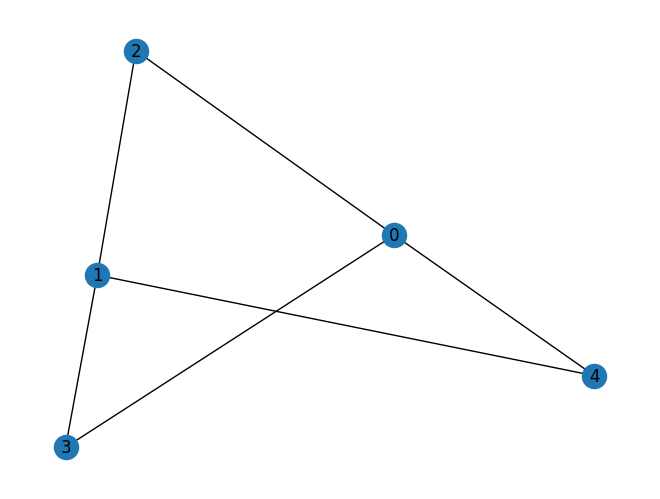

In [2]:
u,v = 2,3
B = nx.complete_bipartite_graph(u, v)
# B.remove_edge(0, 5)
print(f"B({u},{v}) NSCompressible: {B.number_of_edges() > (v+u-1+u*v)/2}")
nx.draw(B, with_labels=True)

In [3]:
Bc = sym.compress_bipartite(B)
print("eff:", Bc.relative_efficiency(B.number_of_edges()))
print("residual:", Bc.H_resid.edges)
print("symm. diff.:", Bc.G_diff_H)
print("edge perm:", Bc.perm)

removed K((3, 2)), eff = 0.33
eff: 0.3333333333333333
residual: [(0, 2), (1, 2)]
symm. diff.: []
edge perm: VertexPermutation(cycles=[[2, 3, 4]])


In [4]:
Bd = Bc.decompress()
# nx.draw(Bd, with_labels=True)
assert nx.is_bipartite(Bd)
assert nx.is_isomorphic(B, Bd)

decompressed H, then removed 0, added 0


In [41]:
g1 = nx.cycle_graph(4)
g2 = nx.cycle_graph(3)

def equal_graphs(g1, g2):
    if g1.number_of_nodes() != g2.number_of_nodes():
        return False
    if g1.number_of_edges() != g2.number_of_edges():
        return False
    
    if set(g1.nodes) != set(g2.nodes):
        return False
    
    if set(g1.edges) != set(g2.edges):
        return False

    return True

equal_graphs(g1, g2)

False

In [1]:
fac = 1
for i in range(1, 9 + 1):
    fac *= i
    print(i, fac)

1 1
2 2
3 6
4 24
5 120
6 720
7 5040
8 40320
9 362880


# isomorphism solver

In [1]:
import networkx as nx
import networkx.algorithms.isomorphism as iso

In [9]:
subgraph = nx.complete_graph(4)
G = subgraph.copy()
nx.add_path(G, range(4, 8))
subgraph = nx.convert_node_labels_to_integers(subgraph, first_label=100)

In [10]:
matcher = iso.GraphMatcher(G, G2=subgraph, node_match=None, edge_match=None) # node and edge attributes are ignored
ismorphisms = list(matcher.subgraph_isomorphisms_iter())
print(len(ismorphisms))
print(ismorphisms)

24
[{0: 100, 1: 101, 2: 102, 3: 103}, {0: 100, 1: 101, 3: 102, 2: 103}, {0: 100, 2: 101, 1: 102, 3: 103}, {0: 100, 2: 101, 3: 102, 1: 103}, {0: 100, 3: 101, 1: 102, 2: 103}, {0: 100, 3: 101, 2: 102, 1: 103}, {1: 100, 0: 101, 2: 102, 3: 103}, {1: 100, 0: 101, 3: 102, 2: 103}, {1: 100, 2: 101, 0: 102, 3: 103}, {1: 100, 2: 101, 3: 102, 0: 103}, {1: 100, 3: 101, 0: 102, 2: 103}, {1: 100, 3: 101, 2: 102, 0: 103}, {2: 100, 0: 101, 1: 102, 3: 103}, {2: 100, 0: 101, 3: 102, 1: 103}, {2: 100, 1: 101, 0: 102, 3: 103}, {2: 100, 1: 101, 3: 102, 0: 103}, {2: 100, 3: 101, 0: 102, 1: 103}, {2: 100, 3: 101, 1: 102, 0: 103}, {3: 100, 0: 101, 1: 102, 2: 103}, {3: 100, 0: 101, 2: 102, 1: 103}, {3: 100, 1: 101, 0: 102, 2: 103}, {3: 100, 1: 101, 2: 102, 0: 103}, {3: 100, 2: 101, 0: 102, 1: 103}, {3: 100, 2: 101, 1: 102, 0: 103}]


### generating (compressed) graphlets

In [12]:
atlas = nx.graph_atlas_g() # all graphs up to 7 nodes

In [29]:
n_connected_of_len = {
    1: 1,
    2: 1,
    3: 2,
    4: 6, # ČM21 Table 2
    5: 21,
    6: 112,
    7: 853,
}

In [14]:
len(atlas)

1253

In [ ]:
nx.draw(atlas[42], with_labels=True)

In [30]:
from collections import defaultdict

len2numconn = defaultdict(int)
for g in atlas[1:]:
    if nx.is_connected(g):
        len2numconn[g.number_of_nodes()] += 1

assert len2numconn == n_connected_of_len

In [33]:
import itertools
from sympy.combinatorics import Permutation

def generate_permutations(n):
    # Generate all permutations of a list of n elements
    permutations = list(itertools.permutations(range(n)))

    # Convert these permutations to cycle notation
    cycle_notation_permutations = [Permutation(p).cyclic_form for p in permutations]

    return cycle_notation_permutations

In [109]:
from sympy.combinatorics.generators import symmetric
all_perms = symmetric(4)
i = 0

In [134]:
i += 1
next(all_perms)

StopIteration: 

In [135]:
i

25

In [39]:
perm = Permutation(1,2)(4,3) # NOTE: inserts fixed point 0
perm.list()

[0, 2, 1, 4, 3]

In [42]:
perm.next_lex()

Permutation(4)(1, 2, 3)

In [155]:
def repr_size(perm: Permutation) -> int:
    """size of permutation, as number of edges (ČM21 encoding)"""
    s = 0
    for cycle_len, mult in perm.cycle_structure.items():
        if cycle_len > 1:
            s += (cycle_len - 1) * mult
    return s

In [158]:
G = nx.cycle_graph(range(1, 4 + 1))
pi = Permutation(1,2)(4,3)
# pi = Permutation(1,3, size=5)
# pi = Permutation(1,2,3,4)
repr_size(pi)

2

In [166]:
from symmetry_compressor import eq_edges

def NSresidual_graph(G: nx.Graph, pi: Permutation) -> list:
    G = G.copy()
    repr_edges = []
    while G.number_of_edges() > 0:
        edge = next(iter(G.edges))
        repr_edges.append(edge)
        G.remove_edge(*edge)

        e = edge
        i=0
        while True:
            i += 1
            if i > 100: raise Exception("Infinite loop")
            e = (pi(e[0]), pi(e[1]))
            if eq_edges(e, edge):
                break
            
            if G.has_edge(*e):
                G.remove_edge(*e)
            else:
                return None # pi is not a symmetry of G

    repr_edges
    return repr_edges

In [168]:
def symmetry_compressible(G: nx.Graph) -> bool:
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    for pi in symmetric(G.number_of_nodes()):
        # print(pi.cyclic_form)
        if (resid := NSresidual_graph(G, pi)) is None: continue

        if repr_size(pi) + len(resid) < G.number_of_edges():
            # print(f"{pi.cyclic_form} {resid}")
            return True
        
    return False

In [169]:
from tqdm import tqdm

len2numSC = defaultdict(int)

for g in tqdm(atlas[1:]):
    if nx.is_connected(g) and symmetry_compressible(g):
        len2numSC[g.number_of_nodes()] += 1

len2numSC

100%|██████████| 1252/1252 [00:52<00:00, 23.99it/s]


defaultdict(int, {4: 3, 5: 13, 6: 87, 7: 649})

### reading the cached graphlets


In [172]:
import json
from pathlib import Path

cache_path = Path("../cache")
with open(cache_path / "atlas_efficiency_4.json", "r") as f:
    atlas_efficiency = json.load(f)

atlas_efficiency

[{'index': 13, 'efficiency': 0.16666666666666663},
 {'index': 14, 'efficiency': 0.16666666666666663},
 {'index': 15, 'efficiency': 0.375},
 {'index': 16, 'efficiency': 0.375},
 {'index': 17, 'efficiency': 0.5},
 {'index': 18, 'efficiency': 0.5833333333333333}]

In [173]:
import graphlets

graphlets.AtlasGraphlet(**atlas_efficiency[0])

AtlasGraphlet(index=13, efficiency=0.16666666666666663)